In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [64]:
data=pd.read_csv('/content/drive/MyDrive/Yüksek Lisans Derin Öğrenme/Clio.csv',on_bad_lines ='skip',delimiter=';')

data.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,735.000 TL,Renault,Clio,1.5 dCi Joy,2016,195.000 km,Düz,Dizel,Hatchback/5,Beyaz,1461 cc,75 hp,Önden Çekiş,"3,6 lt",45 lt,5 boyalı,Takasa Uygun,Galeriden
1,665.000 TL,Renault,Clio,1.5 dCi Joy,2014,158.000 km,Düz,Dizel,Hatchback/3,Beyaz,6001 cm3 ve üzeri,601 HP ve üzeri,Önden Çekiş,-,-,Tamamı orjinal,Takasa Uygun,Galeriden
2,548.000 TL,Renault,Clio,0.9 TCe Joy,2020,119.000 km,Düz,Benzin,Hatchback/5,Beyaz,898 cc,90 hp,Önden Çekiş,5 lt,45 lt,3 boyalı,Takasa Uygun Değil,Galeriden
3,584.000 TL,Renault,Clio,1.5 dCi Joy,2019,123.000 km,Düz,Dizel,Hatchback/5,Beyaz,1461 cc,75 hp,Önden Çekiş,"3,6 lt",45 lt,6 boyalı,Takasa Uygun,Galeriden
4,497.500 TL,Renault,Clio,1.2 Joy,2015,163.500 km,Düz,Benzin,Hatchback/5,Beyaz,1149 cc,75 hp,Önden Çekiş,"5,5 lt",45 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [65]:
data['fiyat'] = data['fiyat'].str.replace(' TL', '').astype(float)
data['km'] = data['km'].str.replace(' km', '').astype(float)


In [66]:
data = data[data['boyaDegisen'] != "-"]
data = data[data['motorGucu'] != "-"]
data = data[data['motorHacmi'] != "-"]
data = data[data['kasa'] != "-"]
data = data[data['yakit'] != "-"]
data = data[data['vites'] != "-"]
data = data[data['km'] != "-"]
data = data[data['yil'] != "-"]
data = data[data['model'] != "-"]

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['model'] = le.fit_transform(data['model'])
data['km'] = le.fit_transform(data['km'])
data['vites'] = le.fit_transform(data['vites'])
data['yakit'] = le.fit_transform(data['yakit'])
data['kasa'] = le.fit_transform(data['kasa'])
data['motorHacmi'] = le.fit_transform(data['motorHacmi'])
data['motorGucu'] = le.fit_transform(data['motorGucu'])
data['boyaDegisen'] = le.fit_transform(data['boyaDegisen'])
data.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,735.0,Renault,Clio,55,2016,327,0,1,1,Beyaz,7,13,Önden Çekiş,"3,6 lt",45 lt,44,Takasa Uygun,Galeriden
1,665.0,Renault,Clio,55,2014,271,0,1,0,Beyaz,10,8,Önden Çekiş,-,-,52,Takasa Uygun,Galeriden
2,548.0,Renault,Clio,1,2020,215,0,0,1,Beyaz,11,18,Önden Çekiş,5 lt,45 lt,30,Takasa Uygun Değil,Galeriden
3,584.0,Renault,Clio,55,2019,219,0,1,1,Beyaz,7,13,Önden Çekiş,"3,6 lt",45 lt,46,Takasa Uygun,Galeriden
4,497.5,Renault,Clio,16,2015,279,0,0,1,Beyaz,0,13,Önden Çekiş,"5,5 lt",45 lt,50,Takasa Uygun,Galeriden


In [68]:
x=data.drop(['fiyat','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)
y=data['vites'].values


In [69]:
x

,model,yil,km,vites,yakit,kasa,motorHacmi,motorGucu,boyaDegisen
0,55,2016,327,0,1,1,7,13,44
1,55,2014,271,0,1,0,10,8,52
2,1,2020,215,0,0,1,11,18,30
3,55,2019,219,0,1,1,7,13,46
4,16,2015,279,0,0,1,0,13,50
...,...,...,...,...,...,...,...,...,...
1014,46,2008,401,0,1,1,7,9,50
1015,61,2019,122,2,1,1,7,18,44
1016,59,2016,263,2,1,3,7,18,46
1017,7,2022,51,1,0,1,12,0,17


In [57]:
data.groupby('vites').mean()

<ipython-input-57-08699d46faf2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('vites').mean()


,fiyat,yil,km
vites,,,
Düz,487.176130,2010.942387,173.170937
Otomatik,744.592898,2018.433071,71.828677
Yarı Otomatik,700.427071,2016.535714,118.560264


In [83]:
X=data.drop(['vites','marka','seri','yakitTuketimi','motorHacmi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=data['vites']
print(X.shape,y.shape)

(996, 8) (996,)


In [84]:
X

,fiyat,model,yil,km,yakit,kasa,motorGucu,boyaDegisen
0,735.00,55,2016,327,1,1,13,44
1,665.00,55,2014,271,1,0,8,52
2,548.00,1,2020,215,0,1,18,30
3,584.00,55,2019,219,1,1,13,46
4,497.50,16,2015,279,0,1,13,50
...,...,...,...,...,...,...,...,...
1014,389.75,46,2008,401,1,1,9,50
1015,673.00,61,2019,122,1,1,18,44
1016,710.00,59,2016,263,1,3,18,46
1017,780.00,7,2022,51,0,1,0,17


In [85]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)

# X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
# y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
# X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
# y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)

In [86]:
mlp=Sequential()
mlp.add(Dense(64,input_dim=8,activation='relu'))
mlp.add(Dense(64,activation='relu'))
mlp.add(Dense(1,activation='sigmoid'))

mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

mlp.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [88]:
history=mlp.fit(X_train,y_train,epochs=50, batch_size=8,validation_data=(X_val,y_val),verbose=0 )
#history=mlp.fit(X_train,y_train,epochs=50, batch_size=8,validation_split=0.10 )

In [89]:
mlp.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: -449.0406 - accuracy: 0.6700


[-449.0406188964844, 0.6700000166893005]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


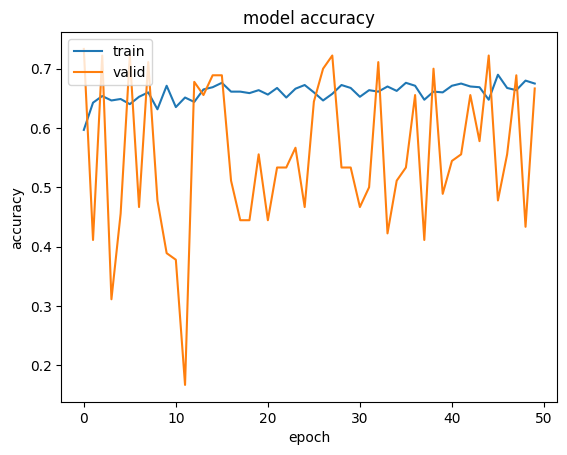

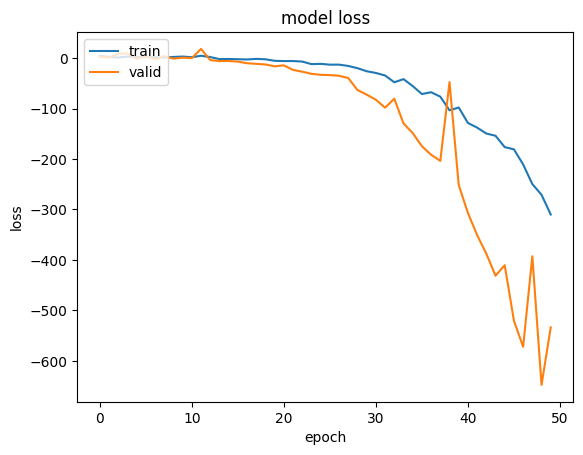

In [90]:
import platform
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [91]:
pred=[]
#pred=mlp.predict(X_test)
pred=(mlp.predict(X_test)>=0.5).astype(int)
#pred[pred<0.5]=0
#pred[pred>=.5]=1
#predIdx=mlp.predict(X_test)
#pred=np.argmax(predIdx,axis=1)
y_pred=[]

for i in pred:
  y_pred.append(i[0])

from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)


4/4 [==============================] - 0s 4ms/step


array([[56, 17,  0],
       [ 1, 11,  0],
       [ 2, 13,  0]])

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        73
           1       0.27      0.92      0.42        12
           2       0.00      0.00      0.00        15

    accuracy                           0.67       100
   macro avg       0.41      0.56      0.42       100
weighted avg       0.73      0.67      0.67       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
########################## Keras İle Modellene İle Tahminleme ####################

In [93]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In [94]:
veri = data
veri.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,735.0,Renault,Clio,55,2016,327,0,1,1,Beyaz,7,13,Önden Çekiş,"3,6 lt",45 lt,44,Takasa Uygun,Galeriden
1,665.0,Renault,Clio,55,2014,271,0,1,0,Beyaz,10,8,Önden Çekiş,-,-,52,Takasa Uygun,Galeriden
2,548.0,Renault,Clio,1,2020,215,0,0,1,Beyaz,11,18,Önden Çekiş,5 lt,45 lt,30,Takasa Uygun Değil,Galeriden
3,584.0,Renault,Clio,55,2019,219,0,1,1,Beyaz,7,13,Önden Çekiş,"3,6 lt",45 lt,46,Takasa Uygun,Galeriden
4,497.5,Renault,Clio,16,2015,279,0,0,1,Beyaz,0,13,Önden Çekiş,"5,5 lt",45 lt,50,Takasa Uygun,Galeriden


In [129]:
X=veri.drop(['vites','marka','seri','yakitTuketimi','motorHacmi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=veri['vites']

In [130]:
print(X_train.shape,y_train.shape)

(796, 8) (796, 3)


In [131]:
num_labels=len(np.unique(y))

In [132]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1014    0
1015    2
1016    2
1017    1
1018    0
Name: vites, Length: 996, dtype: int64

In [133]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [134]:
y=tf.keras.utils.to_categorical(y)

In [135]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [142]:
mlp=Sequential()
mlp.add(Dense(64,input_dim=8,activation='relu'))
mlp.add(Dense(64,activation='relu'))
mlp.add(Dense(3,activation='softmax'))
mlp.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                576       
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4931 (19.26 KB)
Trainable params: 4931 (19.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
from tensorflow import keras
opt = keras.optimizers.SGD(learning_rate=0.01)
mlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [144]:
X_train

,fiyat,model,yil,km,yakit,kasa,motorGucu,boyaDegisen
925,215.0,36,2000,451,2,2,13,29
922,312.0,42,2003,458,1,1,9,50
1001,959.0,9,2023,15,0,1,18,52
49,565.0,16,2015,215,0,1,13,52
766,590.0,55,2017,289,1,1,13,7
...,...,...,...,...,...,...,...,...
786,615.0,54,2015,299,1,1,18,50
74,660.0,1,2020,75,0,1,18,52
929,525.0,12,2011,175,0,1,13,2
245,387.5,46,2008,388,1,2,9,6


In [146]:
mlp.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                576       
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4931 (19.26 KB)
Trainable params: 4931 (19.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
histozry=mlp.fit(X_train,y_train,epochs=100, batch_size=8,validation_split=0.10 )

Epoch 1/100
90/90 [==============================] - 0s 5ms/step - loss: 0.7651 - accuracy: 0.7332 - val_loss: 0.6902 - val_accuracy: 0.7750
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.7652 - accuracy: 0.7332 - val_loss: 0.6903 - val_accuracy: 0.7750
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.7652 - accuracy: 0.7332 - val_loss: 0.6903 - val_accuracy: 0.7750
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 0.7650 - accuracy: 0.7332 - val_loss: 0.6912 - val_accuracy: 0.7750
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 0.7650 - accuracy: 0.7332 - val_loss: 0.6900 - val_accuracy: 0.7750
Epoch 6/100
90/90 [==============================] - 1s 6ms/step - loss: 0.7654 - accuracy: 0.7332 - val_loss: 0.6903 - val_accuracy: 0.7750
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 0.7652 - accuracy: 0.7332 - val_loss: 0.6902 - val_accuracy: 0.7750
Epoch 8/100
9

In [150]:
mlp.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.8010 - accuracy: 0.7100


[0.801021933555603, 0.7099999785423279]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


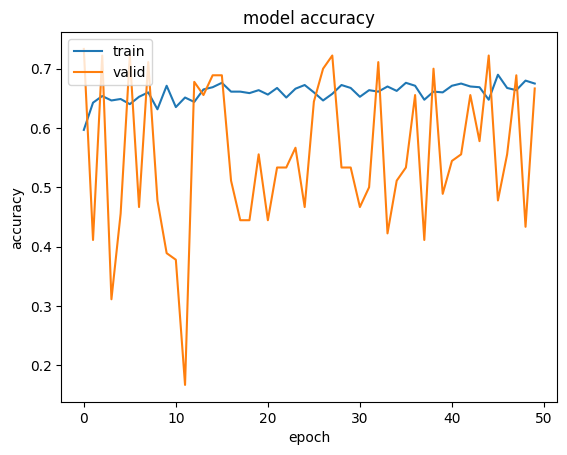

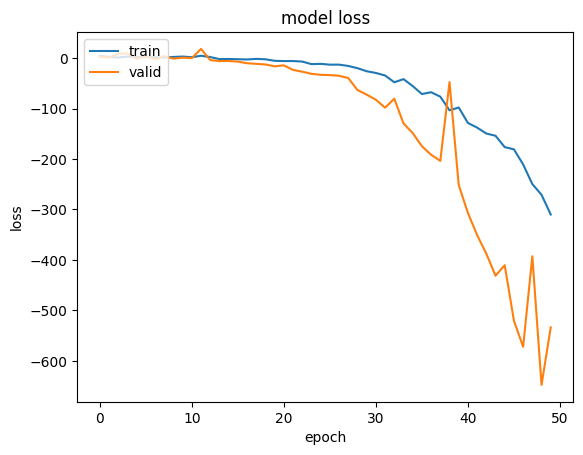

In [151]:

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [152]:
predIdx=mlp.predict(X_test)
pred=np.argmax(predIdx,axis=1)


7/7 [==============================] - 0s 3ms/step


In [153]:
from sklearn.metrics import confusion_matrix
print(pred)
y_test=np.argmax(y_test,axis=1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [154]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0])

In [155]:
confusion_matrix(y_test,pred)

array([[142,   0,   0],
       [ 28,   0,   0],
       [ 30,   0,   0]])

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        30

    accuracy                           0.71       200
   macro avg       0.24      0.33      0.28       200
weighted avg       0.50      0.71      0.59       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
